# Group 8 - Report 4
Gather parameters for the model
## Import data

In [1]:
import pandas as pd
from scipy.stats import chisquare

In [2]:
#Load Data as arrays
RA = pd.read_csv('RANorm.csv', names=['arrival'], usecols=[1])
RD = pd.read_csv('RDNorm.csv', names=['departure'], usecols=[1])
LA = pd.read_csv('LANorm.csv', names=['arrival'], usecols=[1])
LD = pd.read_csv('LDNorm.csv', names=['departure'], usecols=[1])

In [3]:
# Convertime string to seconds
RD["departure"] = pd.to_timedelta(RD["departure"].radd("00:")).dt.total_seconds()
RA["arrival"] = pd.to_timedelta(RA["arrival"].radd("00:")).dt.total_seconds()
LD["departure"] = pd.to_timedelta(LD["departure"].radd("00:")).dt.total_seconds()
LA["arrival"] = pd.to_timedelta(LA["arrival"].radd("00:")).dt.total_seconds()

In [4]:
# Merge into right and left Dataframes
right = pd.concat([RA, RD], axis=1)
left = pd.concat([LA, LD], axis=1)

In [5]:
# add new column "serving time", the difference between departure and the max of arrival or the previous departure
serving_time = []
for i in range(len(right)):
    if i == 0:
        serving_time.append(right['departure'][i] - right['arrival'][i])
    else:
        serving_time.append(right['departure'][i] - max(right['arrival'][i], right['departure'][i-1]))
right['serving_time'] = serving_time
right['serving_time'] = right['serving_time'].clip(lower=0)

In [6]:
serving_time = []
for i in range(len(left)):
    if i == 0:
        serving_time.append(left['departure'][i] - left['arrival'][i])
    else:
        serving_time.append(left['departure'][i] - max(left['arrival'][i], left['departure'][i-1]))
left['serving_time'] = serving_time
left['serving_time'] = left['serving_time'].clip(lower=0)

## Calculate mu and lambda

In [7]:
mu = (right['serving_time'].mean() + left['serving_time'].mean())/2
mu

3.928647959183673

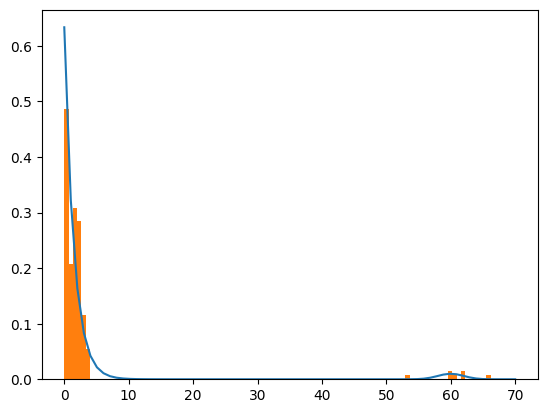

In [13]:
# plot the serving time to a histogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, norm, chi2

x = np.linspace(0, 70, 70)
plt.plot(x, 0.95*expon.pdf(x, 0, 1.5) + 0.05*norm.pdf(x, 60, 2))
plt.hist(right['serving_time'], bins=100, density=True)
plt.show()

In [17]:
len(right['serving_time'])

196

In [16]:
len([a for a in right['serving_time'] if a > 40])

7

In [ ]:
lambda_ = max(right['arrival'].max(), left['arrival'].max()) / (right['arrival'].count() + left['arrival'].count())
lambda_

2.4750595238095237

## Model interarrival times

In [ ]:
# get the interarrival time for the system (right + left)
interarrival = []

combined = pd.concat([right, left], axis=0)
combined = combined.sort_values(by=['arrival'])
combined = combined.reset_index(drop=True)

for i in range(len(combined)):
    if i == 0:
        interarrival.append(combined['arrival'][i])
    else:
        interarrival.append(combined['arrival'][i] - combined['arrival'][i-1])
combined['interarrival'] = interarrival
combined['interarrival'] = combined['interarrival'].clip(lower=0)

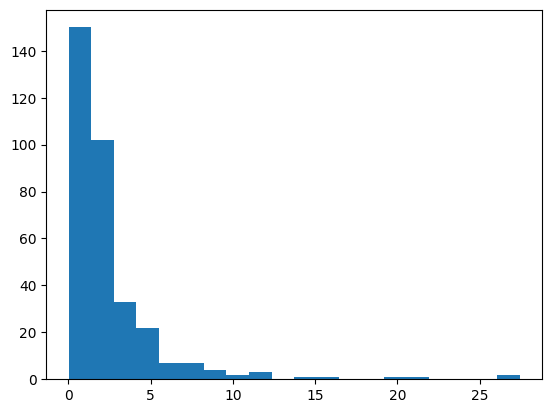

In [ ]:
# plot the interarrival time to a histogram
import matplotlib.pyplot as plt
plt.hist(combined['interarrival'], bins=20)
plt.show()

In [ ]:
# get mean of interarrival time
combined['interarrival'].mean()

2.4750595238095237

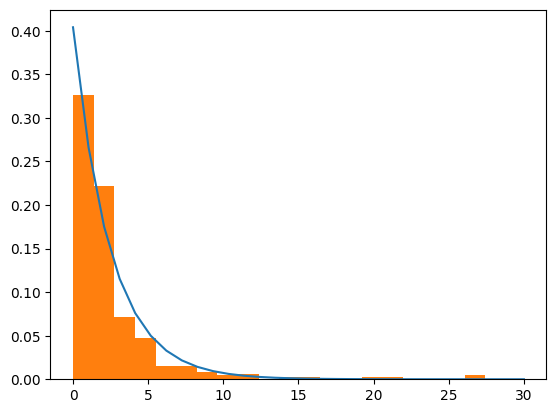

In [ ]:
# plot exponential distribution with that mean on top of the histogram
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

x = np.linspace(0, 30, 30)

plt.plot(x, expon.pdf(x, scale=combined['interarrival'].mean()))
plt.hist(combined['interarrival'], bins=20, density=True)
plt.show()